# 经纬度转栅格

In [1]:
from Utils import CalcGrid, OperJson
import transbigdata as tbd

gParameters = OperJson.JSONConfig('./Parameters.json')
gBoundsWuhan = gParameters.get('gBoundsWuhan')

# print(gParameters.get('gPreprocessDataSavePath'))
# lon1, lat1, lon2, lat2
gGeoParameters = tbd.area_to_params(location = gBoundsWuhan, 
                                    accuracy = gParameters.get('gAccuracy'), 
                                    method = gParameters.get('gMethod'))

In [ ]:
# [115.4, 39.4, 117.55, 41.1]
# [113.68, 29.97, 115.08, 31.37]
CG_WebMercator = CalcGrid.GridMapperWebMercator(gBoundsWuhan[0], 
                         gBoundsWuhan[1], 
                         gBoundsWuhan[2],
                         gBoundsWuhan[3],
                         grid_size_m=gParameters.get('gAccuracy'))

testgrid = CG_WebMercator.latlon_to_grid(115.03, 31.35)
testgrid

27919

In [5]:
CG_UTM = CalcGrid.GridMapperUTM(gBoundsWuhan[0], 
                         gBoundsWuhan[1], 
                         gBoundsWuhan[2],
                         gBoundsWuhan[3],
                         cell_size_m=gParameters.get('gAccuracy'))

# testgrid = CG_UTM.lonlat_to_grid(117.52, 41.05)
testgrid = CG_UTM.lonlat_to_grid(115.03, 31.35)
testgrid

20345

In [6]:
CG_Ellipsoid = CalcGrid.GridMapperEllipsoid(gBoundsWuhan[0], 
                         gBoundsWuhan[1], 
                         gBoundsWuhan[2],
                         gBoundsWuhan[3],
                         cell_size_m=gParameters.get('gAccuracy'))

# testgrid = CG_Ellipsoid.lonlat_to_grid(117.52, 41.05)
testgrid = CG_Ellipsoid.lonlat_to_grid(115.03, 31.35)
testgrid

20276

In [7]:
tlon, tlat = CG_Ellipsoid.grid_to_lonlat(testgrid)
tlon, tlat

(115.03132935565549, 31.345561597353324)

In [2]:
print(x)

['00:00:00', '00:00:05', '00:00:10', '00:00:15', '00:00:20', '00:00:25', '00:00:30', '00:00:35', '00:00:40', '00:00:45', '00:00:50', '00:00:55', '00:01:00', '00:01:05', '00:01:10', '00:01:15', '00:01:20', '00:01:25', '00:01:30', '00:01:35', '00:01:40', '00:01:45', '00:01:50', '00:01:55', '00:02:00', '00:02:05', '00:02:10', '00:02:15', '00:02:20', '00:02:25', '00:02:30', '00:02:35', '00:02:40', '00:02:45', '00:02:50', '00:02:55', '00:03:00', '00:03:05', '00:03:10', '00:03:15', '00:03:20', '00:03:25', '00:03:30', '00:03:35', '00:03:40', '00:03:45', '00:03:50', '00:03:55', '00:04:00', '00:04:05', '00:04:10', '00:04:15', '00:04:20', '00:04:25', '00:04:30', '00:04:35', '00:04:40', '00:04:45', '00:04:50', '00:04:55', '00:05:00', '00:05:05', '00:05:10', '00:05:15', '00:05:20', '00:05:25', '00:05:30', '00:05:35', '00:05:40', '00:05:45', '00:05:50', '00:05:55', '00:06:00', '00:06:05', '00:06:10', '00:06:15', '00:06:20', '00:06:25', '00:06:30', '00:06:35', '00:06:40', '00:06:45', '00:06:50', '00

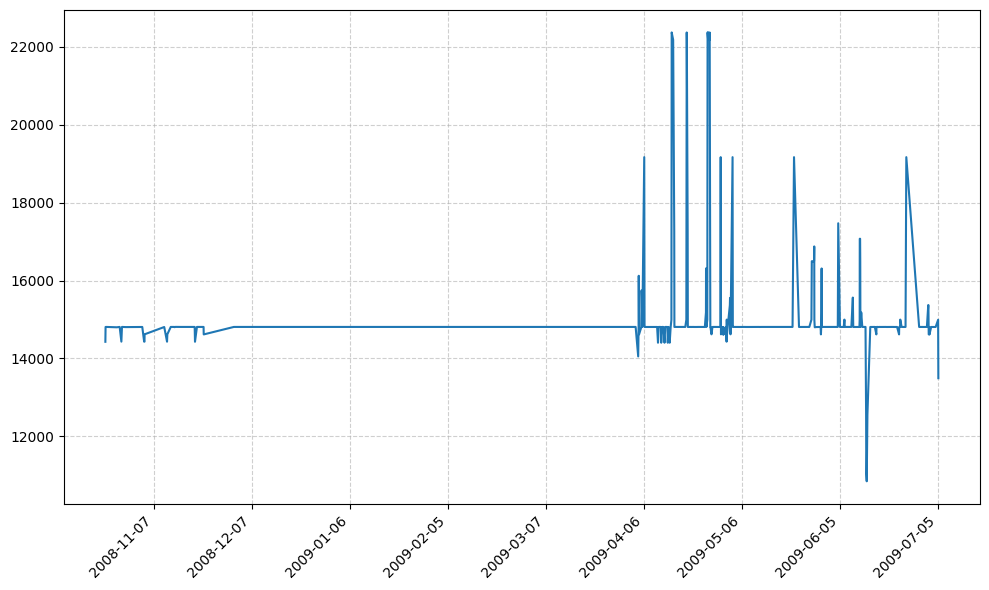

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plotTraj(df):
    df['stime'] = pd.to_datetime(df['stime'])

    plt.figure(figsize=(10, 6))
    plt.plot(df['stime'], df['grid'])

    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
    plt.xticks(rotation=45, ha='right')

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

df000 = pd.read_csv('./Data/Output/Stays/000.csv', index_col=0)
plotTraj(df000)

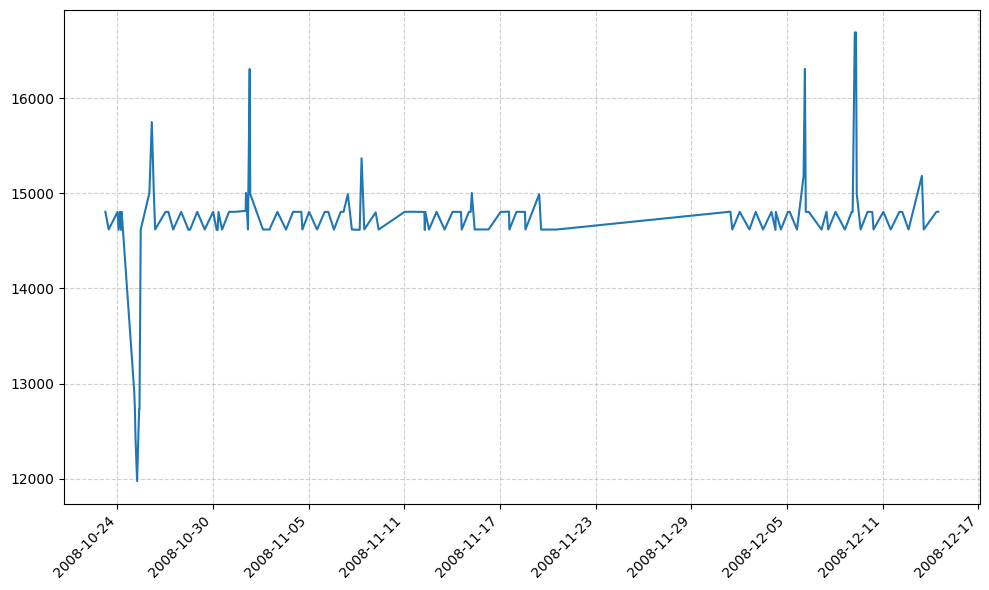

In [3]:
df001 = pd.read_csv('./Data/Output/Stays/001.csv', index_col=0)
plotTraj(df001)

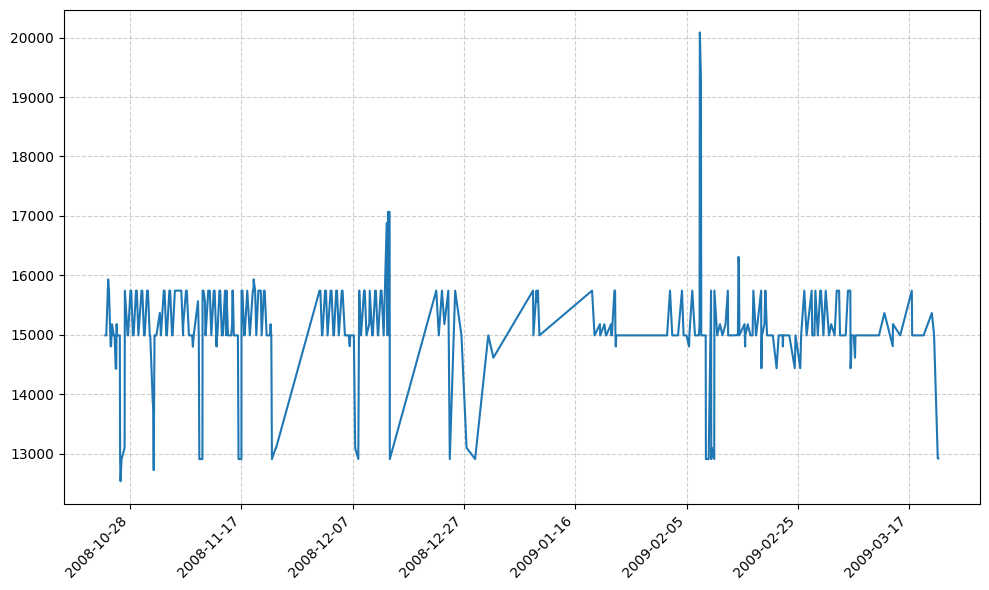

In [4]:
df = pd.read_csv('./Data/Output/Stays/002.csv', index_col=0)
plotTraj(df)

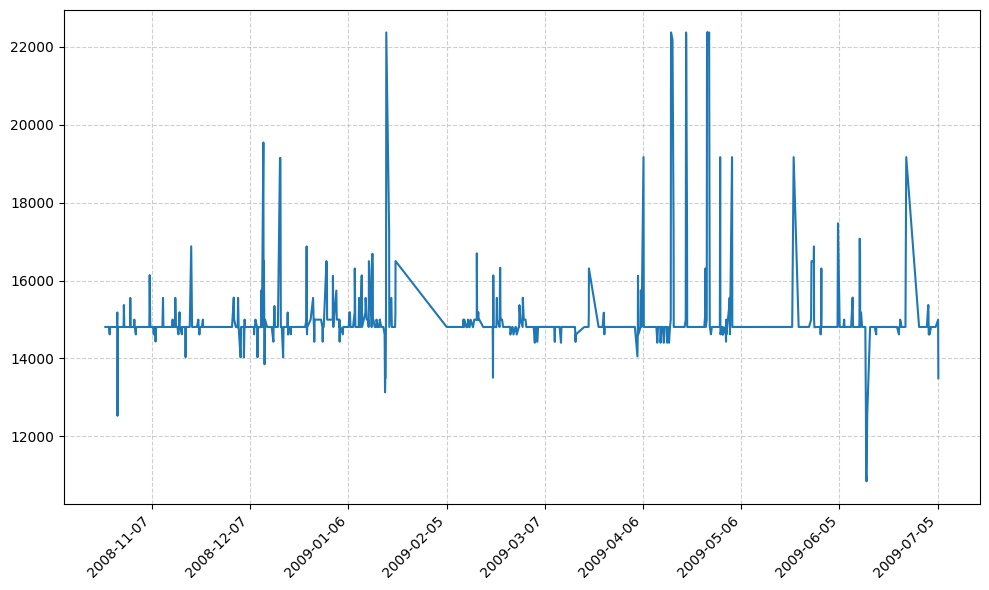

In [5]:
df = pd.read_csv('./Data/Output/Stays/003.csv', index_col=0)
plotTraj(df)